In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import plotly.express as px
from scipy.signal import lombscargle

In [6]:
df = pd.read_csv("test6_jonas_rest.csv")
# print(df)
df['time (sec)'] = df['t normalized (ms)'] / 1000
# Extract time and amplitude
fig = px.line(df, x='time (sec)', y='intensity normalized')
fig.show()


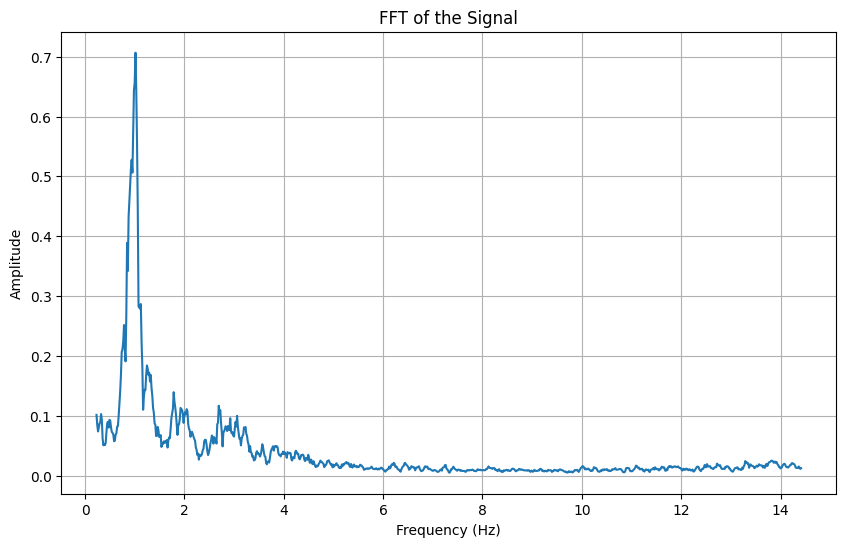

In [10]:
# Calculate the time step (assuming uniform spacing)
time = df['time (sec)'].values
amplitude = df['intensity normalized'].values
dt = np.mean(np.diff(time))  # or use np.mean(np.diff(time)) if it's not perfectly uniform

# Compute FFT
N = len(amplitude)
yf = fft(amplitude)
xf = fftfreq(N, dt)[:N//2]  # Take the positive half of the frequencies
amplitude_spectrum = 2.0/N * np.abs(yf[:N//2])

# Define frequency slice
start = 15
end = int(len(xf) / 3)

# Smooth using moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w), mode='same') / w

smoothed_amplitude = moving_average(amplitude_spectrum, w=5)  # Adjust window size as needed


start = 15
end = int(len(xf) / 3)
# Plot FFT
plt.figure(figsize=(10, 6))
plt.plot(xf[start:end], smoothed_amplitude[start:end])
plt.title("FFT of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

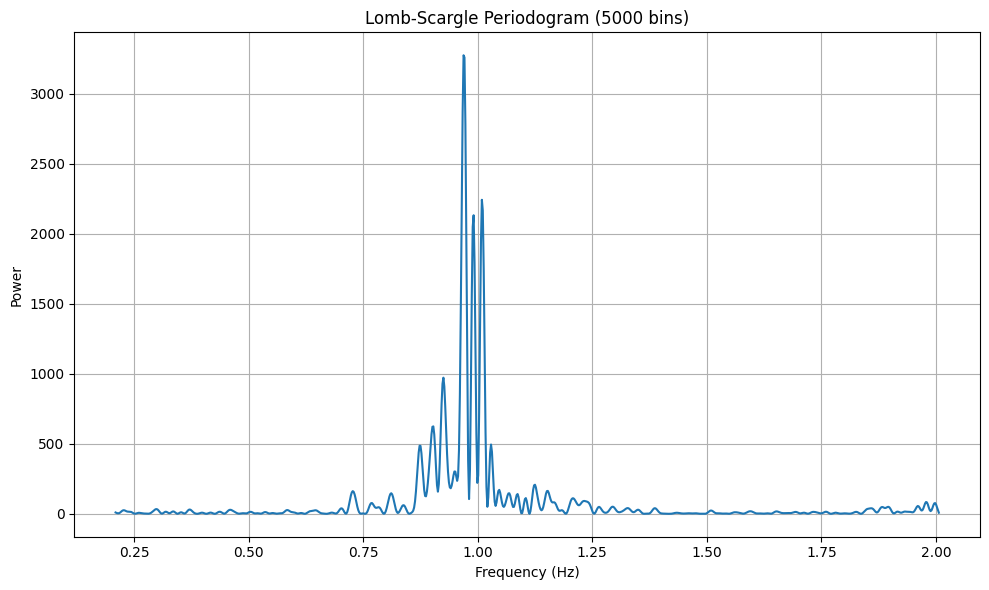

In [9]:
# Detrend the signal (optional but usually helpful)
amplitude = amplitude - np.mean(amplitude)

# Define frequency range
f_min = 0.01  # Hz, adjust based on your data
f_max = 10    # Hz, or something like 1 / min(np.diff(time)) if unsure

# Convert to angular frequencies (radians/second)
frequencies = np.linspace(f_min, f_max, 5000)
angular_freqs = 2 * np.pi * frequencies

# Compute Lomb-Scargle periodogram
power = lombscargle(time, amplitude, angular_freqs)

start = 100
end = 1000
# Plot
plt.figure(figsize=(10, 6))
plt.plot(frequencies[start:end], power[start:end])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram (5000 bins)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
print(max(smoothed_amplitude[start:end]))
print(np.argmax(smoothed_amplitude[start:end]))
print(xf[start:end][np.argmax(smoothed_amplitude[start:end])])

0.706714021078364
51
1.0152511206214707
